<a href="https://colab.research.google.com/github/MuhammadHatta72/machine-learning-semester5/blob/main/midterm/UTS_Simplified.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from sklearn.cluster import MiniBatchKMeans
import glob

In [7]:
images = []
for img in glob.glob("/content/drive/MyDrive/Machine Learning-Semester 5/UTS/dummy/*"):
    n= cv2.imread(img)
    images.append(n)

In [ ]:
def scale_data(img):
    h, w, ch= img.shape
    data = img / 255.0
    data = data.reshape(h * w, ch)
    return data


def plot_pixels_3d(data, title, colors=None, N=10000, ax=None):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    ax.scatter(R, G, B, c=colors, marker='.')
    ax.set_xlabel('R')
    ax.set_ylabel('G')
    ax.set_zlabel('B')
    ax.set_title(title, size=14)

def img_comparison(original, new_colors):
    new_plate = new_colors.reshape(original.shape)
    fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                           subplot_kw=dict(xticks=[], yticks=[]))
    fig.subplots_adjust(wspace=0.05)
    ax[0].imshow(original)
    ax[0].set_title('Original Image', size=16)
    ax[1].imshow(new_plate)
    ax[1].set_title('2-color Image', size=16);

def kmeans_cluster(original):
    data = scale_data(original)
    kmeans = MiniBatchKMeans(2,n_init=3)
    kmeans.fit(data)
    new_colors = kmeans.cluster_centers_[kmeans.predict(data)]
    # Create a figure with two subplots side by side
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5), subplot_kw={'projection': '3d'})

    # Call the function for the first subplot
    plot_pixels_3d(data, "16 million possible colors", ax=ax1)

    # Call the function for the second subplot
    plot_pixels_3d(data, "2 colors", colors=new_colors, ax=ax2)
    plt.show()
    img_comparison(original, new_colors)



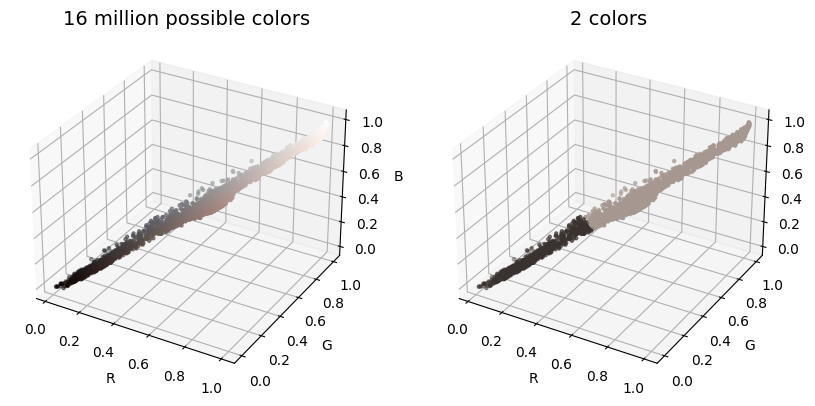

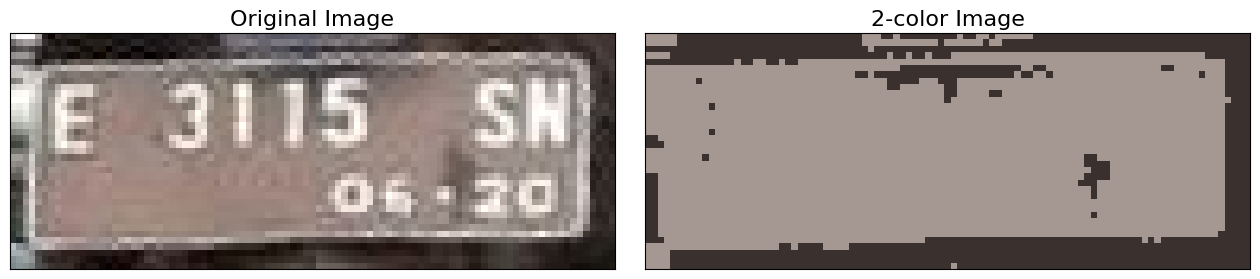

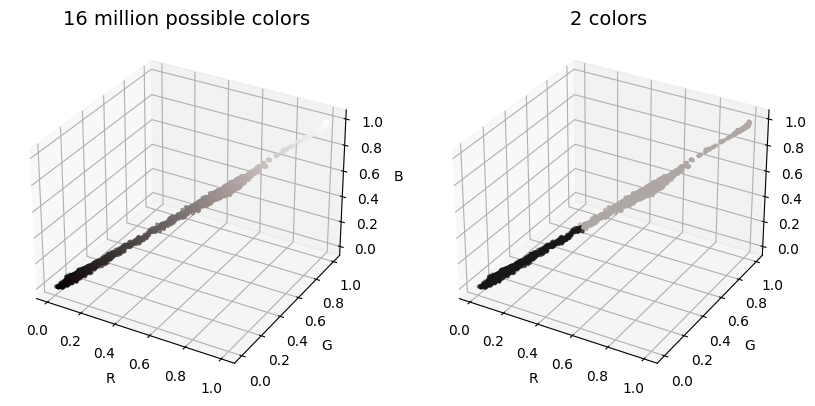

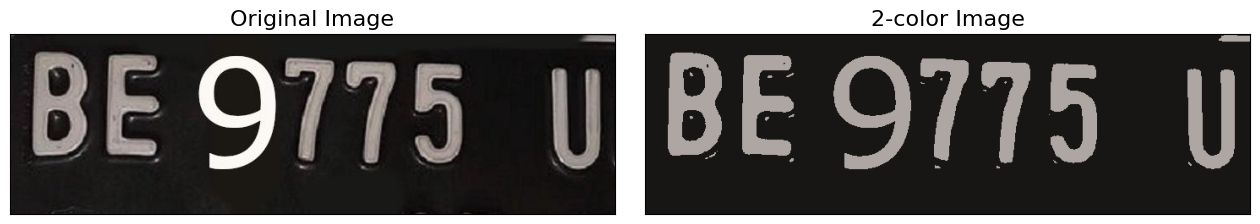

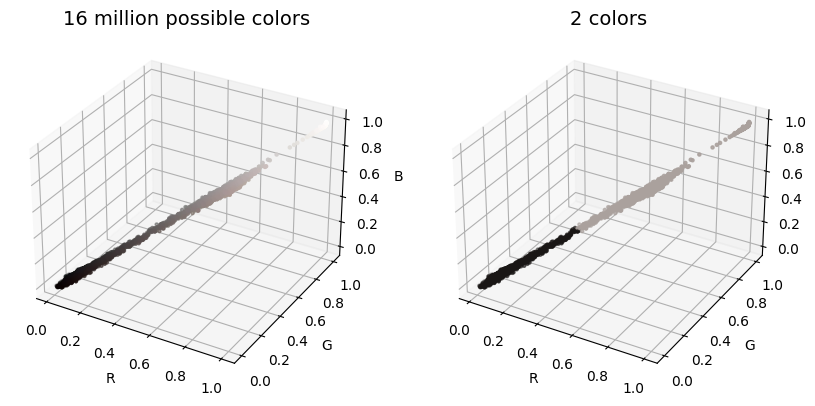

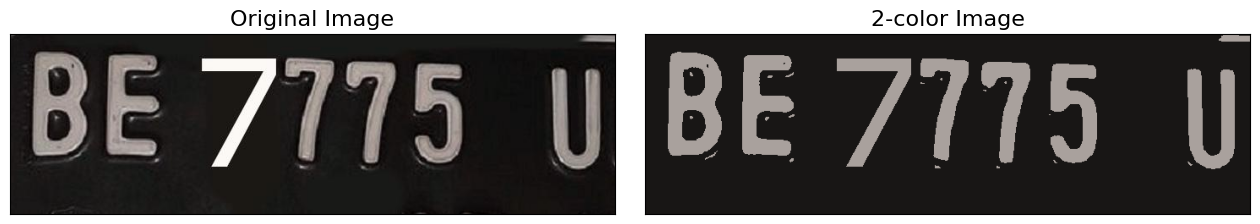

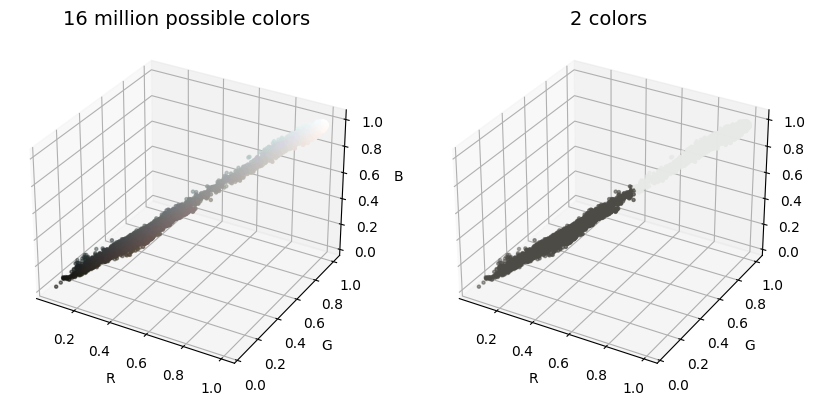

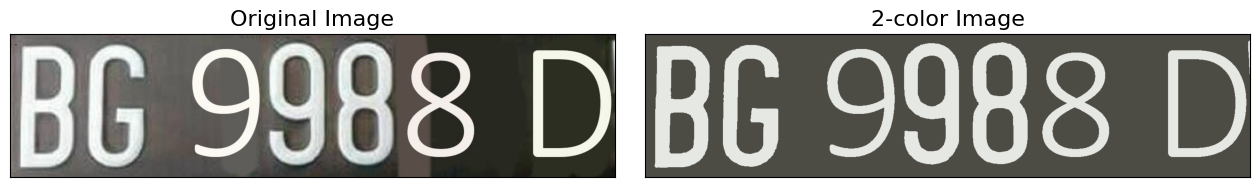

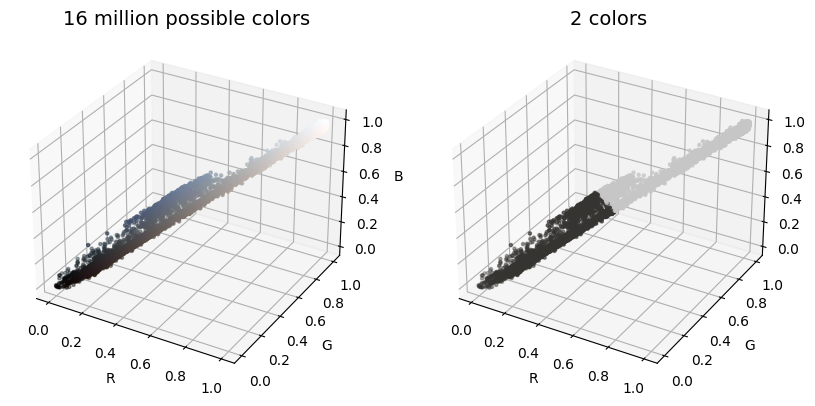

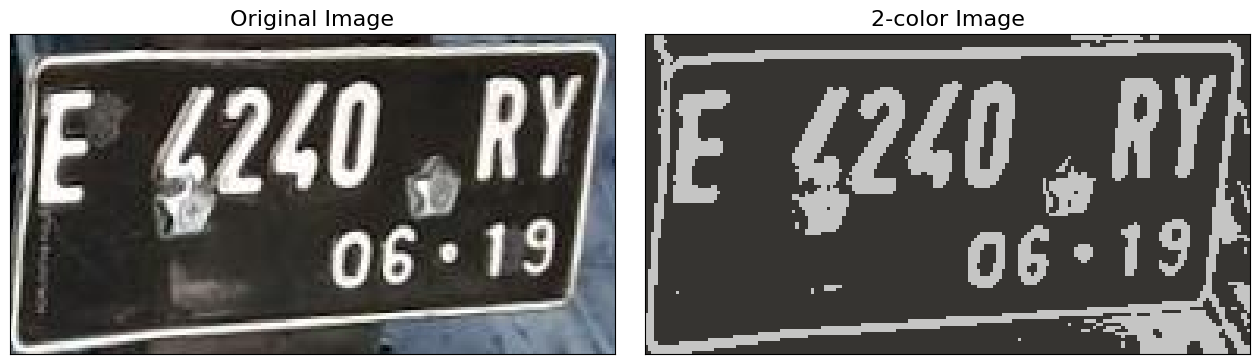

In [8]:
dataset = [10,20,30,41,9] #pilih index gambar mana saja yg mau di kluster
for data in dataset:
    kmeans_cluster(images[data])